# ACTIVIDAD DE CLASIFICACIÓN DE TEXTO

En esta actividad vamos a trabajar en clasificar textos. Se recorrerá todo el proceso desde traer el dataset hasta proceder a dicha clasificación. Durante la actividad se llevarán a cabo muchos procesos como la creación de un vocabulario, el uso de embeddings y la creación de modelos.

Las cuestiones presentes en esta actividad están basadas en un Notebook creado por François Chollet, uno de los creadores de Keras y autor del libro "Deep Learning with Python".

En este Notebook se trabaja con el dataset "Newsgroup20" que contiene aproximadamente 20000 mensajes que pertenecen a 20 categorías diferentes.

El objetivo es entender los conceptos que se trabajan y ser capaz de hacer pequeñas experimentaciones para mejorar el Notebook creado.

# Librerías

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Descarga de Datos

In [ ]:
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

17329808/17329808 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import os
import pathlib

#Estructura de directorios del dataset
data_dir = pathlib.Path(data_path).parent / "news20_extracted/20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

Number of directories: 20
Directory names: ['talk.politics.guns', 'rec.sport.baseball', 'comp.windows.x', 'sci.space', 'talk.politics.mideast', 'comp.sys.mac.hardware', 'talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'comp.graphics', 'misc.forsale', 'talk.religion.misc', 'alt.atheism', 'sci.electronics', 'rec.motorcycles', 'sci.crypt', 'sci.med', 'rec.sport.hockey', 'soc.religion.christian', 'comp.os.ms-windows.misc', 'rec.autos']


In [ ]:
print(data_dir)

/root/.keras/datasets/news20_extracted/20_newsgroup


In [ ]:
#Algunos archivos de la categoria "com.graphics"
fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:15])

Number of files in comp.graphics: 1000
Some example filenames: ['38591', '38357', '38235', '38794', '38899', '38726', '38410', '38338', '38353', '39676', '38214', '38685', '38289', '38472', '38245']


In [ ]:
#Ejemplo de un texto de la categoría "com.graphics"
print(open(data_dir / "comp.graphics" / "37261").read())

Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:37261 alt.graphics:519 comp.graphics.animation:2614
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!zaphod.mps.ohio-state.edu!darwin.sura.net!dtix.dt.navy.mil!oasys!lipman
From: lipman@oasys.dt.navy.mil (Robert Lipman)
Newsgroups: comp.graphics,alt.graphics,comp.graphics.animation
Subject: CALL FOR PRESENTATIONS: Navy SciViz/VR Seminar
Message-ID: <32850@oasys.dt.navy.mil>
Date: 19 Mar 93 20:10:23 GMT
Article-I.D.: oasys.32850
Expires: 30 Apr 93 04:00:00 GMT
Reply-To: lipman@oasys.dt.navy.mil (Robert Lipman)
Followup-To: comp.graphics
Distribution: usa
Organization: Carderock Division, NSWC, Bethesda, MD
Lines: 65


			CALL FOR PRESENTATIONS
	
      NAVY SCIENTIFIC VISUALIZATION AND VIRTUAL REALITY SEMINAR

			Tuesday, June 22, 1993

	    Carderock Division, Naval Surface Warfare Center
	      (formerly the David Taylor Research Center)
			  Bethesda, Maryland

SPONSOR: NESS (Navy Engineering Software System) is sponsori

In [ ]:
#Algunos archivos de la categoria "talk.politics.misc"
fnames = os.listdir(data_dir / "talk.politics.misc")
print("Number of files in talk.politics.misc:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of files in talk.politics.misc: 1000
Some example filenames: ['178867', '178722', '178818', '178816', '176929']


In [ ]:
#Ejemplo de un texto de la categoría "talk.politics.misc"
print(open(data_dir / "talk.politics.misc" / "178463").read())

Xref: cantaloupe.srv.cs.cmu.edu talk.politics.guns:54219 talk.politics.misc:178463
Newsgroups: talk.politics.guns,talk.politics.misc
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!darwin.sura.net!martha.utcc.utk.edu!FRANKENSTEIN.CE.UTK.EDU!VEAL
From: VEAL@utkvm1.utk.edu (David Veal)
Subject: Re: Proof of the Viability of Gun Control
Message-ID: <VEAL.749.735192116@utkvm1.utk.edu>
Lines: 21
Sender: usenet@martha.utcc.utk.edu (USENET News System)
Organization: University of Tennessee Division of Continuing Education
References: <1qpbqd$ntl@access.digex.net> <C5otvp.ItL@magpie.linknet.com>
Date: Mon, 19 Apr 1993 04:01:56 GMT

[alt.drugs and alt.conspiracy removed from newsgroups line.]

In article <C5otvp.ItL@magpie.linknet.com> neal@magpie.linknet.com (Neal) writes:

>   Once the National Guard has been called into federal service,
>it is under the command of the present. Tha N

In [ ]:
list_all_dir = [
    'alt.atheism',
    'comp.graphics',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.misc',
    'talk.religion.misc'
]

In [ ]:
#PREGUNTA 1: Cálculo del número medio de tokens

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

fnames = os.listdir(data_dir / "comp.graphics")

total_tokens=0
for i in (range(15)):
    doc = nlp(pathlib.Path(data_dir / "comp.graphics" / fnames[i]).read_text(encoding="latin-1"))
    doc.__len__()
    total_tokens+=doc.__len__()

average_tokens = total_tokens/15

print(average_tokens)

281.53333333333336


In [ ]:
#EJERCICIO 2

samples = []
labels = []
class_names = []
class_index = 0


minima_longitud = 100000
minima_cabecera = 100000
fichero_min_longitud = None


for dirname in list_all_dir:
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")

        #Comprobamos si el fichero actual es el fichero con un menor numero de lineas
        numero_lineas_total = len(lines)
        minima_longitud = min(minima_longitud, len(lines))
        if (len(lines) == minima_longitud):
            fichero_min_longitud = fpath

       #Descartamos las 10 primeras lineas del texto y hayamos el valor de la cabecera minima
        lines = lines[10:] #Aquí es donde se descartan las 10 primeras líneas de cada archivo
        cabecera = numero_lineas_total - len(lines)
        minima_cabecera = min(minima_cabecera, cabecera)
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

#Mostramos los resultados
print("-----------------------------------------------")
print("Minima longitud hallada: ", minima_longitud)
print("Fichero con menor longitud: ", fichero_min_longitud)
print("-----------------------------------------------")
print(open(fichero_min_longitud).read())
print("-----------------------------------------------")
print("Cabecera minima: ", minima_cabecera)
print("-----------------------------------------------")
print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
-----------------------------------------------
Minima longitud hallada:  9
Fichero con menor longitud:  /root/.keras/datasets/news20_extracted/20_newsgroup/sci.crypt/16027
-----------------------------------------------
Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!wupost!newsfeed.rice.edu!lub001.lamar.edu!newsfeed.rice.edu!bcm!cs.u

# Mezclando los datos para separarlos en Traning y Test

In [ ]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)
keras.utils.set_random_seed(seed)

#EJERCICIO 3, si se reduce ese numero cambia el tamaño de la división que se realizan los datos.

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [ ]:
#EJERCICIO 4

print(train_samples[0])
print("-------------------------------------------")
print(val_samples[0])
print("-------------------------------------------")
print(train_labels[0])
print("-------------------------------------------")
print(val_labels[0])


Alan Carter writes:

>> 3.  On April 19, a NO-OP command was sent to reset the command loss timer to
>> 264 hours, its planned value during this mission phase.

> This activity is regularly reported in Ron's interesting posts. Could
> someone explain what the Command Loss Timer is?

The name is rather descriptive.  It's a command to the spacecraft that tells
it "If you don't hear from Earth after 264 hours, assume something is wrong
with your (the spacecraft) attitude, and go into a preprogrammed search mode
in an attempt to reacquire the signal from Earth."

The spacecraft and Earth are not in constant communication with each other.
Earth monitors the telemetry from the spacecraft, and if everything is fine,
there's no reason to send it any new information.  But from the spacecraft's
point of view, no information from Earth could mean either everything is
fine, or that the spacecraft has lost signal acquisition.  Just how long
should the spacecraft wait before it decides that somethi

# Tokenización de las palabras con TextVectorization

In [ ]:
from tensorflow.keras.layers import TextVectorization
#numero maximo de tokens que el vectorizador va a considerar.
#El output trunca la longitud maxima del vector de salida.
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

Procesando archivos...


100%|██████████| 11998/11998 [00:57<00:00, 207.89it/s]


Número total de tokens: 4748676
Media de tokens: 395.78896482747126
Percentiles (25, 50, 75): [136. 242. 415.]


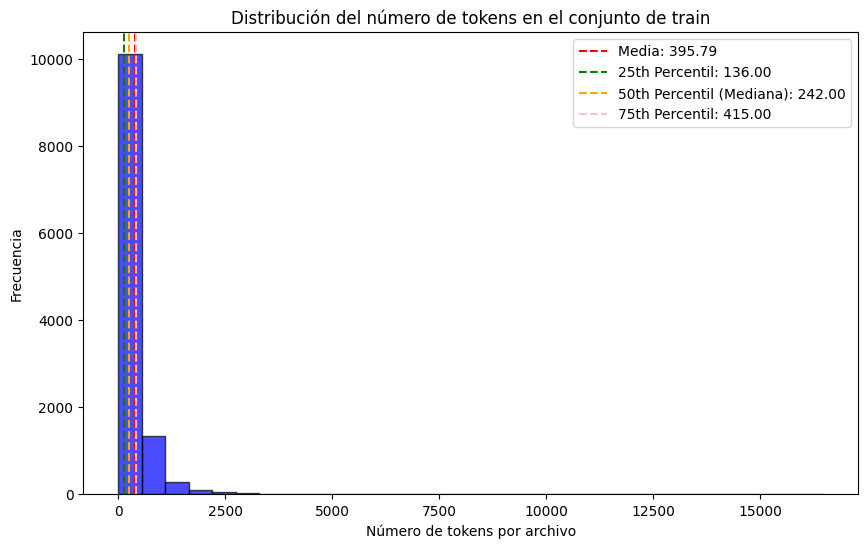

In [ ]:
#Ejercicio 5
import multiprocessing
from tqdm import tqdm
import matplotlib.pyplot as plt

# Función para procesar un texto y contar los tokens
def count_tokens(text):
    doc = nlp.make_doc(text)
    return len(doc)

# Usar multiprocesamiento para procesar los archivos de train
def process_files_multiprocessing(file_list):
    with multiprocessing.Pool(processes=os.cpu_count()) as pool:
        token_counts = list(tqdm(pool.imap(count_tokens, file_list), total=len(file_list)))
    return token_counts

# Procesar archivos y contar tokens
print("Procesando archivos...")
train_token_counts = process_files_multiprocessing(train_samples)

# Calcular estadísticas
mean_tokens = np.mean(train_token_counts)
percentiles = np.percentile(train_token_counts, [25, 50, 75])

# Mostrar estadísticas
print(f"Número total de tokens: {sum(train_token_counts)}")
print(f"Media de tokens: {mean_tokens}")
print(f"Percentiles (25, 50, 75): {percentiles}")

# Graficar la distribución de tokens
plt.figure(figsize=(10, 6))
plt.hist(train_token_counts, bins=30, alpha=0.7, color="blue", edgecolor="black")
plt.axvline(mean_tokens, color="red", linestyle="--", label=f"Media: {mean_tokens:.2f}")
plt.axvline(percentiles[0], color="green", linestyle="--", label=f"25th Percentil: {percentiles[0]:.2f}")
plt.axvline(percentiles[1], color="orange", linestyle="--", label=f"50th Percentil (Mediana): {percentiles[1]:.2f}")
plt.axvline(percentiles[2], color="pink", linestyle="--", label=f"75th Percentil: {percentiles[2]:.2f}")
plt.title("Distribución del número de tokens en el conjunto de train")
plt.xlabel("Número de tokens por archivo")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'to', 'of']

In [ ]:
len(vectorizer.get_vocabulary())

20000

# Viendo la salida de Vectorizer

In [ ]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([   2, 3867, 1891,   18,    2, 4793])

In [ ]:
output

<tf.Tensor: shape=(1, 200), dtype=int64, numpy=
array([[   2, 3867, 1891,   18,    2, 4793,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 3867, 1891, 18, 2, 4793]

# Tokenización de los datos de entrenamiento y validación

In [ ]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

# Creación y entrenamiento del modelo. Red Neuronal Clásica

In [ ]:
modeloClasico = keras.models.Sequential()
modeloClasico.add(keras.layers.Embedding(20000, 10))
modeloClasico.add(keras.layers.Flatten())
modeloClasico.add(keras.layers.Dense(512, activation='relu'))
modeloClasico.add(keras.layers.Dropout(0.3))
modeloClasico.add(keras.layers.Dense(20, activation='softmax'))

In [ ]:
#Ejercicio 6
modeloClasico.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeloClasico.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
modeloClasico.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))
print(modeloClasico.summary())

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - acc: 0.1005 - loss: 2.7843 - val_acc: 0.1931 - val_loss: 2.4379
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - acc: 0.2656 - loss: 2.2363 - val_acc: 0.3358 - val_loss: 1.9411
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - acc: 0.4994 - loss: 1.5878 - val_acc: 0.4802 - val_loss: 1.5231
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - acc: 0.6671 - loss: 1.0582 - val_acc: 0.5705 - val_loss: 1.2710
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.7806 - loss: 0.7150 - val_acc: 0.6265 - val_loss: 1.1221
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - acc: 0.8547 - loss: 0.4812 - val_acc: 0.6422 - val_loss: 1.0850
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - acc: 0.8972 - loss: 0.3428 - val_acc: 0.6569 - val_loss: 1.0852
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.9184 - loss: 0.2611 - val_acc: 0.6649 - val_loss: 1.0925
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9346

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 10)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,024,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,469,546 (9.42 MB)

 Trainable params: 1,234,772 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,234,774 (4.71 MB)

None


# Evaluación

In [ ]:
#Ejercicio 7
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = modeloClasico(x)
end_to_end_model = keras.Model(string_input, preds)

In [ ]:
probabilities = end_to_end_model(
    keras.ops.convert_to_tensor(
        [["this message is about computer graphics and 3D modeling"]]
    )
)

print(class_names[np.argmax(probabilities[0])])

comp.graphics


In [ ]:
probabilities = end_to_end_model(
    keras.ops.convert_to_tensor(
        [["politics and federal courts law that people understand with politician and elects congressman"]]
    )
)

print(class_names[np.argmax(probabilities[0])])

talk.politics.guns


In [ ]:
probabilities = end_to_end_model(
    keras.ops.convert_to_tensor(
        [["we are talking about religion"]]
    )
)

print(class_names[np.argmax(probabilities[0])])

sci.med
